# Generate Basic Signals

If your MDF files are locked away, prorietary, or otherwise unavailable. Generate simple signals, save them to a MDF file and re-open them for analysis.

Generate basic controls signals:

In [1]:
import mdfgen
for signal_generator in mdfgen.signal_generators:
    print(signal_generator.__name__)

sine
cosine
square
sawtooth
triangle
pwm
step


In [2]:
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [21]:
tf = 10  # [s]
f  = 1000000 # [Hz]
# Multiple time vectors
t = np.arange(0, tf, 1/f, dtype=np.float32)

In [22]:
from asammdf import Signal

Plot the signal with matplotlib.

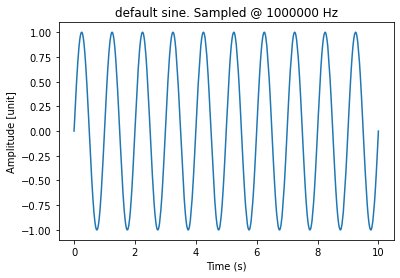

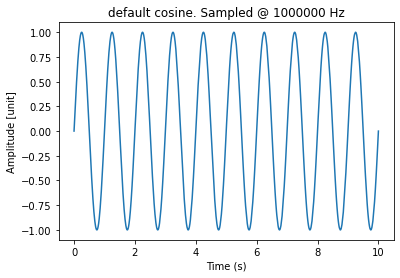

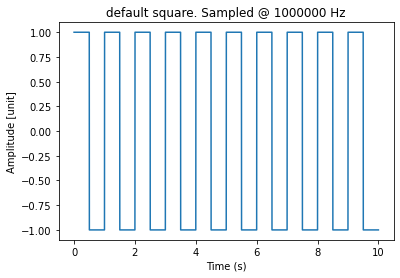

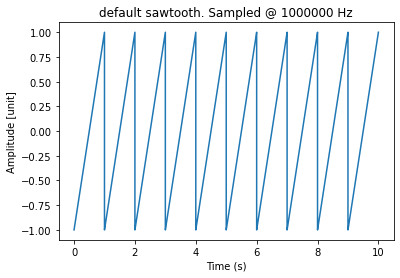

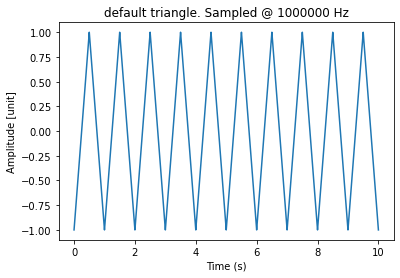

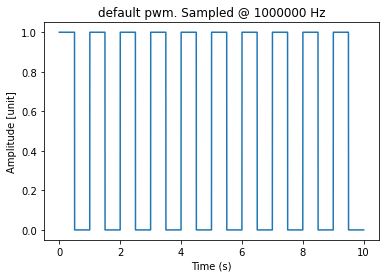

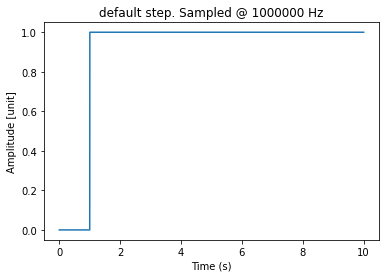

In [23]:
sigs = list()
for signal_generator in mdfgen.signal_generators:
    plt.figure()
    y = signal_generator(t)
    
    sig = Signal(
        y,
        t,
        name=signal_generator.__name__,
        unit=None,
        conversion=None,
        comment=f"default {signal_generator.__name__}",
    )
    sigs.append(sig)
    # Method 1.
    plt.plot(t, y)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude [unit]")
    plt.title(f"default {signal_generator.__name__}. Sampled @ {f} Hz")
    plt.savefig(f"default_{signal_generator.__name__}.png", transparent=False, bbox_inches='tight')

## Plot the signals with ```asammdf```

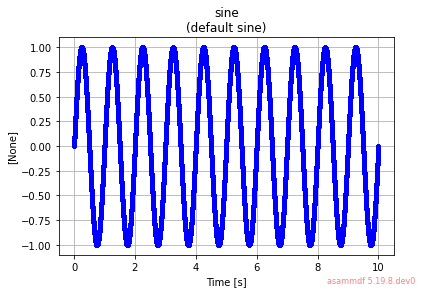

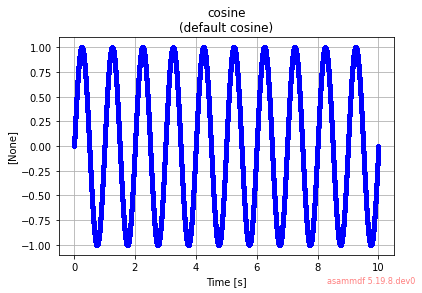

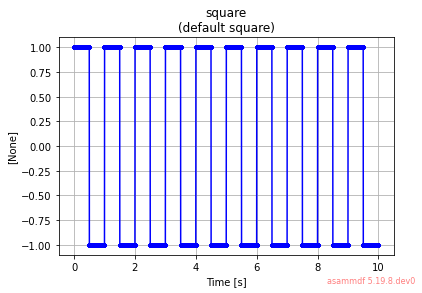

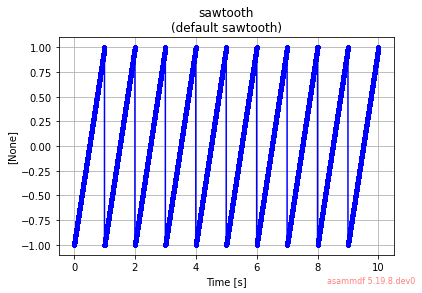

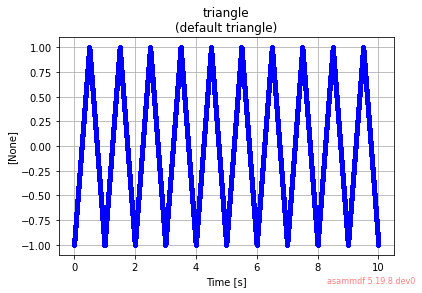

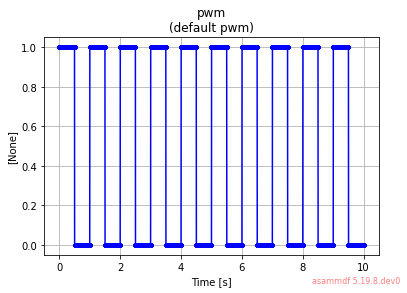

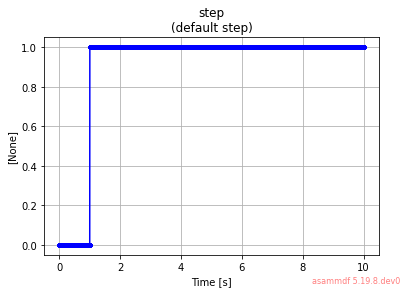

In [24]:
for sig in sigs:
    sig.plot()

## Save MDF File

In [25]:
from asammdf import MDF

In [26]:
# Generated in 90_BasicSignals.ipynb
mdf_file = "90_BasicSignals_hf.mf4"

In [27]:
mdf = MDF(
        version='4.11',
    )
mdf.append(
    signals=sigs,
    common_timebase=True,
)
o = mdf.save(
    dst=mdf_file,
    overwrite=True,
    compression=2,
)

In [28]:
# Clear out the old object.
del mdf

# Open MDF & Plot Signals

In [29]:
mdf = MDF(mdf_file)

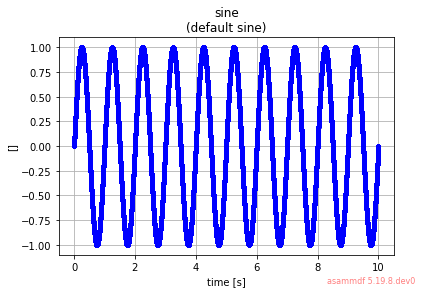

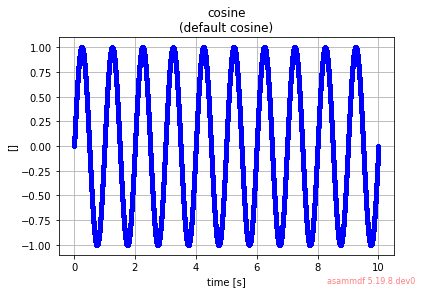

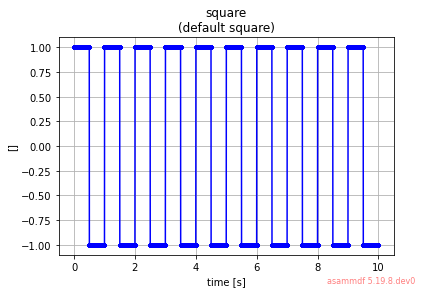

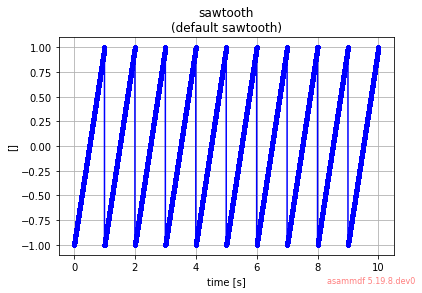

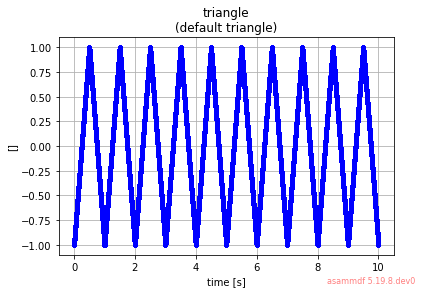

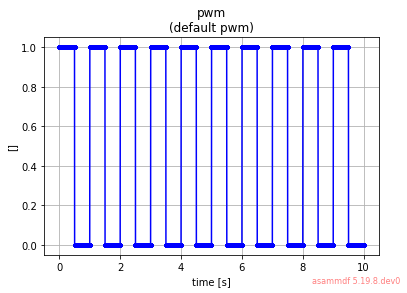

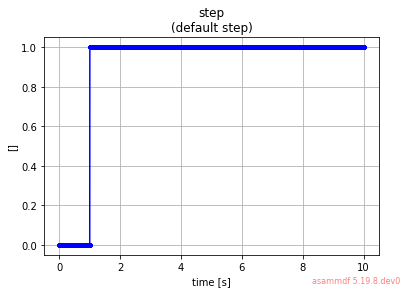

In [30]:
for channel in mdf.iter_channels():
    channel.plot()